# Bases de Traitement d'Images : TP 4
# Convolution et filtrage linéaire

## I. Définition générale

En traitement du signal classique, le filtrage se fait dans le domaine
temporel au moyen du produit de convolution, ou dans le domaine de
Fourier via une multiplication. Ces opérations sont des opérations
linéaires.

En traitement d'image, le même type de filtrage est utilisé. Dans un
premier temps, nous nous contenterons du produit de convolution en deux
dimensions, dans le domaine spatial. Une image est typiquement un signal
échantillonné selon deux dimensions $x$ et $y$. Le filtre spatial,
appelé *masque de convolution* et noté $h$ est lui aussi à deux
dimensions discrètes. Par commodité, les masques de convolution sont de
taille impaire, afin d'avoir un pixel central centré sur un pixel
quelconque de l'image.\
L'opération de convolution d'une image $I[i,j]$ par un masque $h[i,j]$
de taille $N \times M$ est : $$\begin{aligned}
    S[i,j]=\sum_{k=-\frac{N-1}{2}}^{\frac{N-1}{2}}\sum_{l=-\frac{M-1}{2}}^{\frac{M-1}{2}}I[i-k,j-l]h[k,l]\end{aligned}$$
L'opération de convolution est calculée en tout point de l'image source
en 3 étapes :

1.  On centre le masque (par exemple un masque carré 3$\times$3) sur le
    pixel courant

2.  On inverse le masque dans les sens horizontaux et verticaux

3.  On calcule les $N \times M$ produits entre le pixel de l'image et la
    valeur du masque

4.  On somme tous ces produits pour obtenir le pixel filtré.

La valeur des masques de convolution est choisie avec un coefficient
afin de ne pas saturer l'image.\
En traitement d'image, les filtres linéaires sont classés en deux
familles. D'une part les filtres passe-bas, qui suppriment les hautes
fréquences. Les contours seront atténués, l'image sera plus floue.
D'autre part les filtres passent-haut, qui accentuent les contours et
servent de détecteurs de contours.

## II. Application

Soient les quatre masques de convolution suivants :

$$\begin{aligned}
  H_1=\frac{1}{9}\begin{bmatrix}
  1 & 1 & 1 \\
  1 & 1 & 1 \\
  1 & 1 & 1 \\
  \end{bmatrix} \nonumber\end{aligned}$$

$$\begin{aligned}
  H_2=\begin{bmatrix}
  -1 & -1 & -1 \\
  0 & 0 & 0 \\
  1 & 1 & 1 \\
  \end{bmatrix} \nonumber\end{aligned}$$

$$\begin{aligned}
  H_3=\begin{bmatrix}
  -1 & -2 & -1 \\
  0 & 0 & 0 \\
  1 & 2 & 1 \\
  \end{bmatrix} \nonumber\end{aligned}$$

$$\begin{aligned}
  H_4=\begin{bmatrix}
  0 & -1 & 0 \\
  -1 & 4 & -1 \\
  0 & -1 & 0 \\
  \end{bmatrix} \nonumber\end{aligned}$$

1.  De quel type sont ces filtres ?

In [2]:
import numpy as np

H1 est un filtre moyenneur uniforme, donc passe bas

H2 est un filtre detecteur de contours horizontaux et moyenneur horizontal// filtre d'ordre 1 vertical (Prewitt)

H3 est un filtre detecteur de contours horizontaux 2nd ordre, de maniere plus prononcé, et moyenneur horizontal // filtre passe haut dérivateur ordre 2 vertical (Sobel)

H4 est un filtre detecteur de contours dans les directions verticales et horizontales // somme de deux laplaciens (vertical et horizontal)

In [3]:
H1 = 1/9 * np.ones((3,3))

H2 = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

H3 = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

H4 = np.array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])
 



2.  Ouvrez les images dominos.png et monde.png et filtrez-les avec la
    commande $signal.convolve2d()$ de *Scipy*.

In [4]:
from  scipy import signal
import matplotlib.pyplot as plt


In [6]:
dominos = plt.imread('dominos.png').copy()
monde = plt.imread('monde.png')


dominos_h1 = signal.convolve2d(dominos,H1)
dominos_h2 = signal.convolve2d(dominos,H2)
dominos_h3 = signal.convolve2d(dominos,H3)
dominos_h4 = signal.convolve2d(dominos,H4)

monde_h1 = signal.convolve2d(monde,H1)
monde_h2 = signal.convolve2d(monde,H2)
monde_h3 = signal.convolve2d(monde,H3)
monde_h4 = signal.convolve2d(monde,H4)




Text(0.5, 1.0, 'Image filtrée H4')

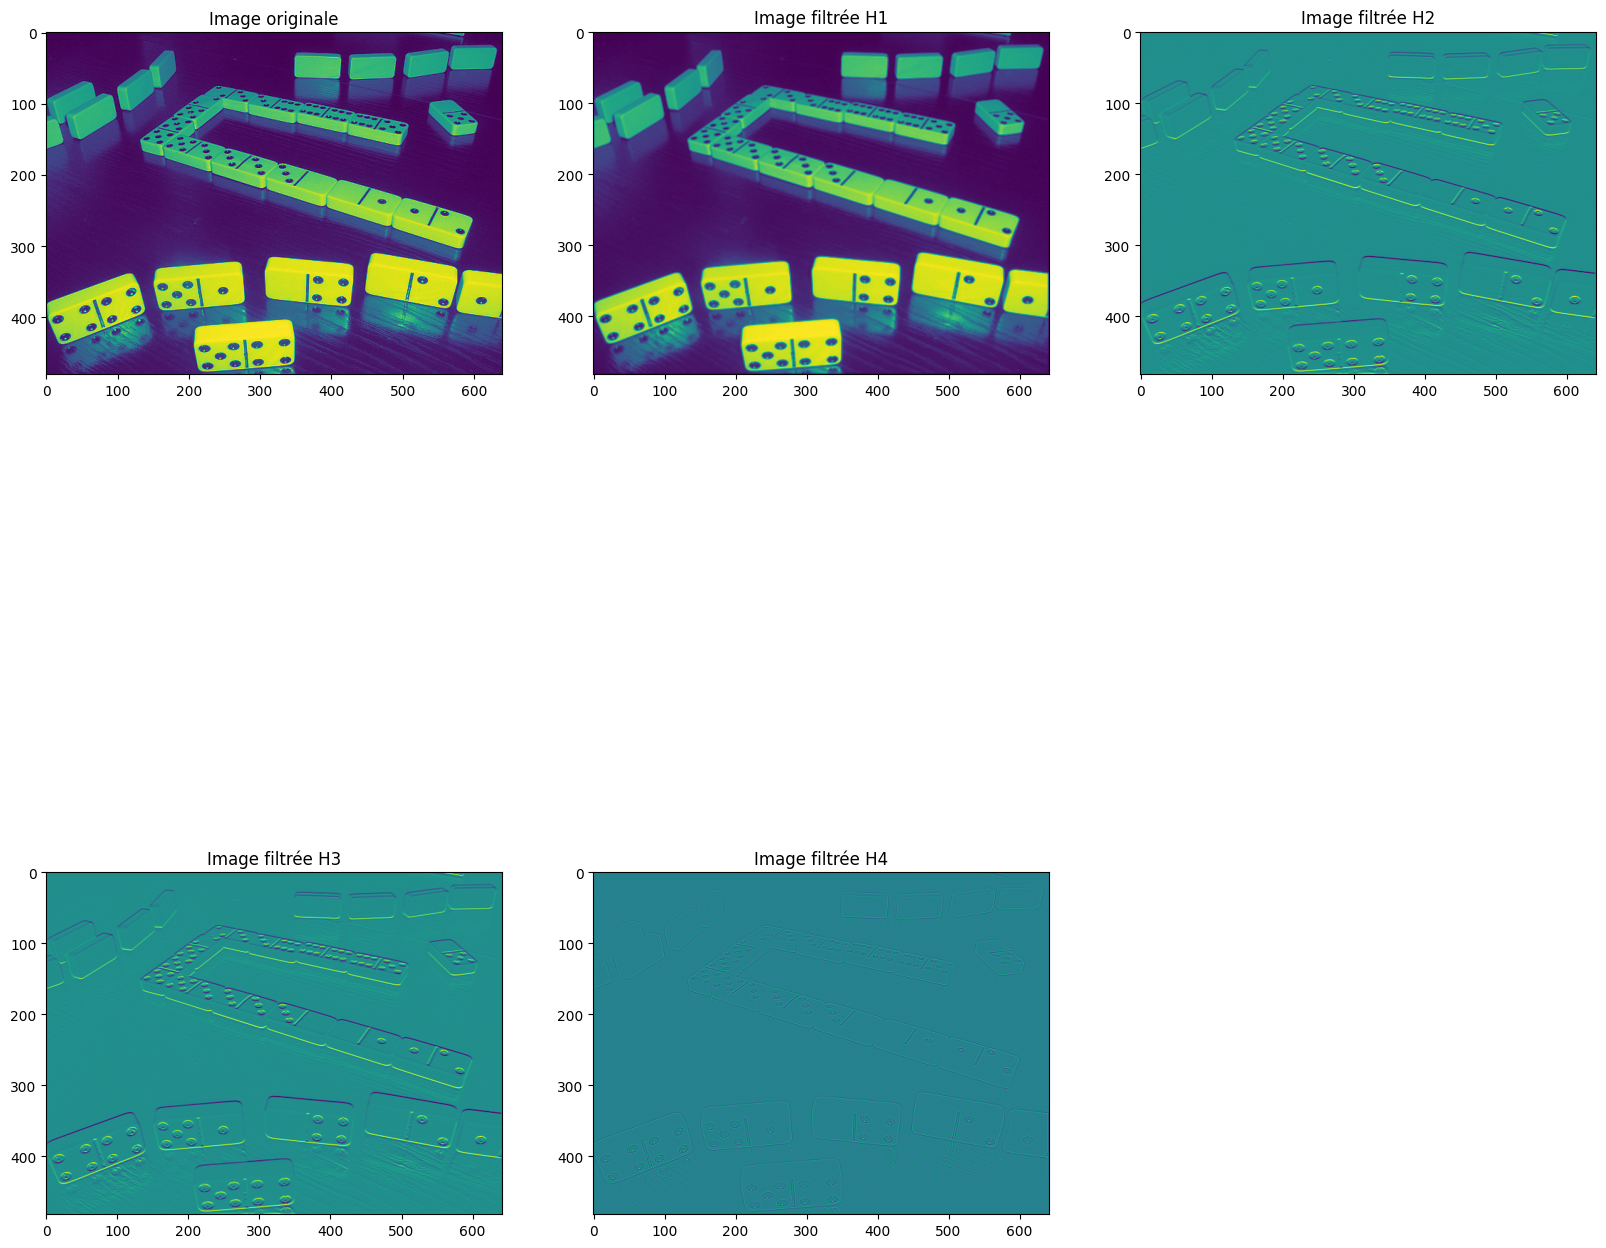

In [7]:
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
plt.imshow(dominos)
plt.title("Image originale")

plt.subplot(2,3,2)
plt.imshow(dominos_h1)
plt.title("Image filtrée H1")

plt.subplot(2,3,3)
plt.imshow(dominos_h2)
plt.title("Image filtrée H2")

plt.subplot(2,3,4)
plt.imshow(dominos_h3)
plt.title("Image filtrée H3")

plt.subplot(2,3,5)
plt.imshow(dominos_h4)
plt.title("Image filtrée H4")

Text(0.5, 1.0, 'Image filtrée H4')

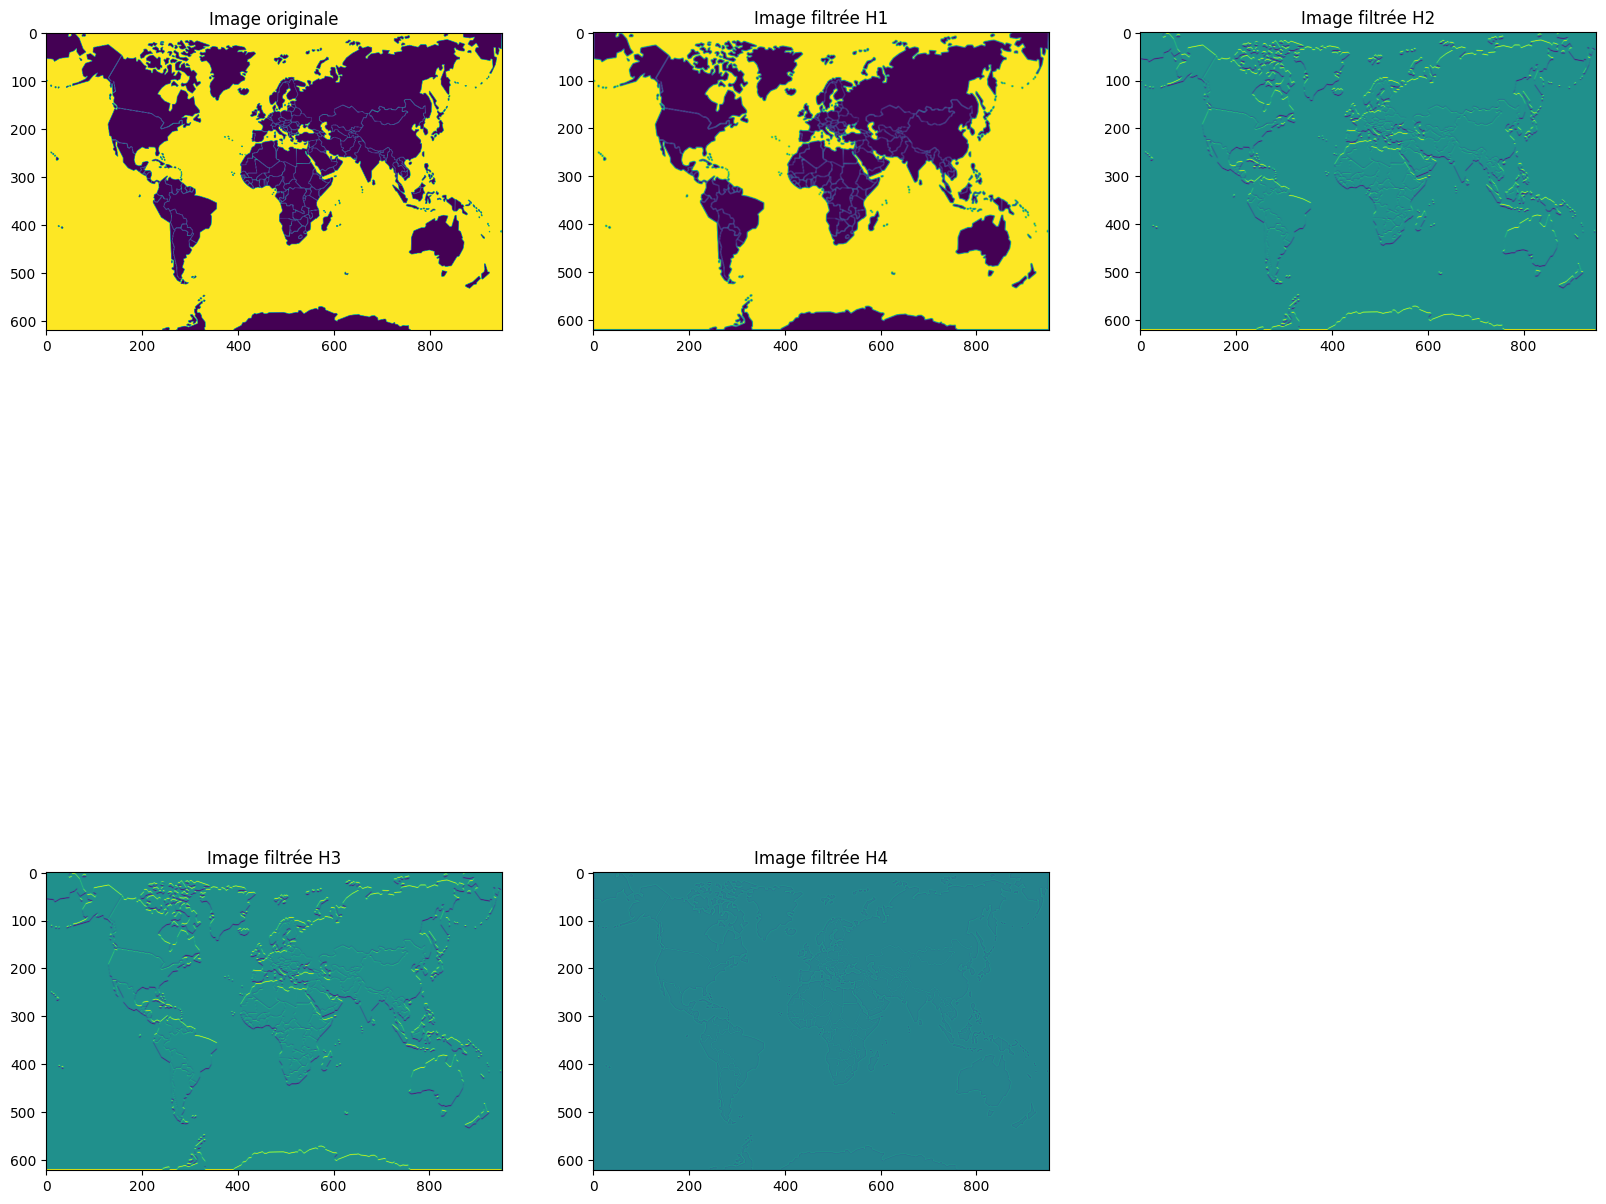

In [8]:
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
plt.imshow(monde)
plt.title("Image originale")

plt.subplot(2,3,2)
plt.imshow(monde_h1)
plt.title("Image filtrée H1")

plt.subplot(2,3,3)
plt.imshow(monde_h2)
plt.title("Image filtrée H2")

plt.subplot(2,3,4)
plt.imshow(monde_h3)
plt.title("Image filtrée H3")

plt.subplot(2,3,5)
plt.imshow(monde_h4)
plt.title("Image filtrée H4")

3.  Quelles sont les valeurs extrêmes des images filtrées ?
    Comment afficher uniquement les contours négatifs ? Positifs ?
    Comment afficher tous les contours, indépendamment de leur signe ?

In [5]:
max_dominos = [np.max(dominos_h1),np.max(dominos_h2),np.max(dominos_h3),np.max(dominos_h4)]
min_dominos = [np.min(dominos_h1),np.min(dominos_h2),np.min(dominos_h3),np.min(dominos_h4)]

max_monde = [np.max(monde_h1),np.max(monde_h2),np.max(monde_h3),np.max(monde_h4)]
min_monde = [np.min(monde_h1),np.min(monde_h2),np.min(monde_h3),np.min(monde_h4)]

print("dominos filtré max : ",max_dominos,'\n',"dominos filtré  min: ",min_dominos)
print("monde filtré max : ",max_monde,'\n',"monde filtré  min: ",min_monde)




NameError: name 'dominos_h1' is not defined

In [ ]:
for h in H:
    convol_domino = signal.convolve2d(domino, h)
    convol_monde = signal.convolve2d(monde, h)
    
    print("Pour le filtre :","\n", h )
    print("Valeurs extrêmes de l'image filtrée de domino : min =", np.min(convol_domino), ", max =", np.max(convol_domino))
    print("Valeurs extrêmes de l'image filtrée de monde : min =", np.min(convol_monde), ", max =", np.max(convol_monde))
    print()

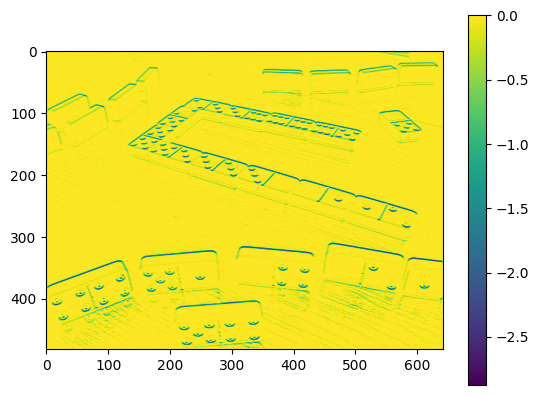

In [10]:
#afficher les coontours negatifs : 

dom_h2_neg = dominos_h2.copy()



dom_h2_neg[dom_h2_neg>0] = 0

# plt.figure(figsize=(20,20))

# plt.subplot(1,2,1)
# plt.imshow(dom_h2_neg)

# plt.subplot(1,2,2)
# plt.imshow(dom_h2_pos)

plt.imshow(dom_h2_neg)
plt.colorbar()






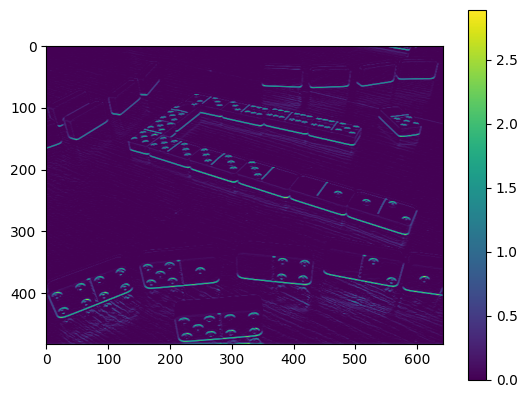

In [11]:
dom_h2_pos = dominos_h2.copy()

dom_h2_pos[dom_h2_pos<0] = 0

plt.imshow(dom_h2_pos)
plt.colorbar()



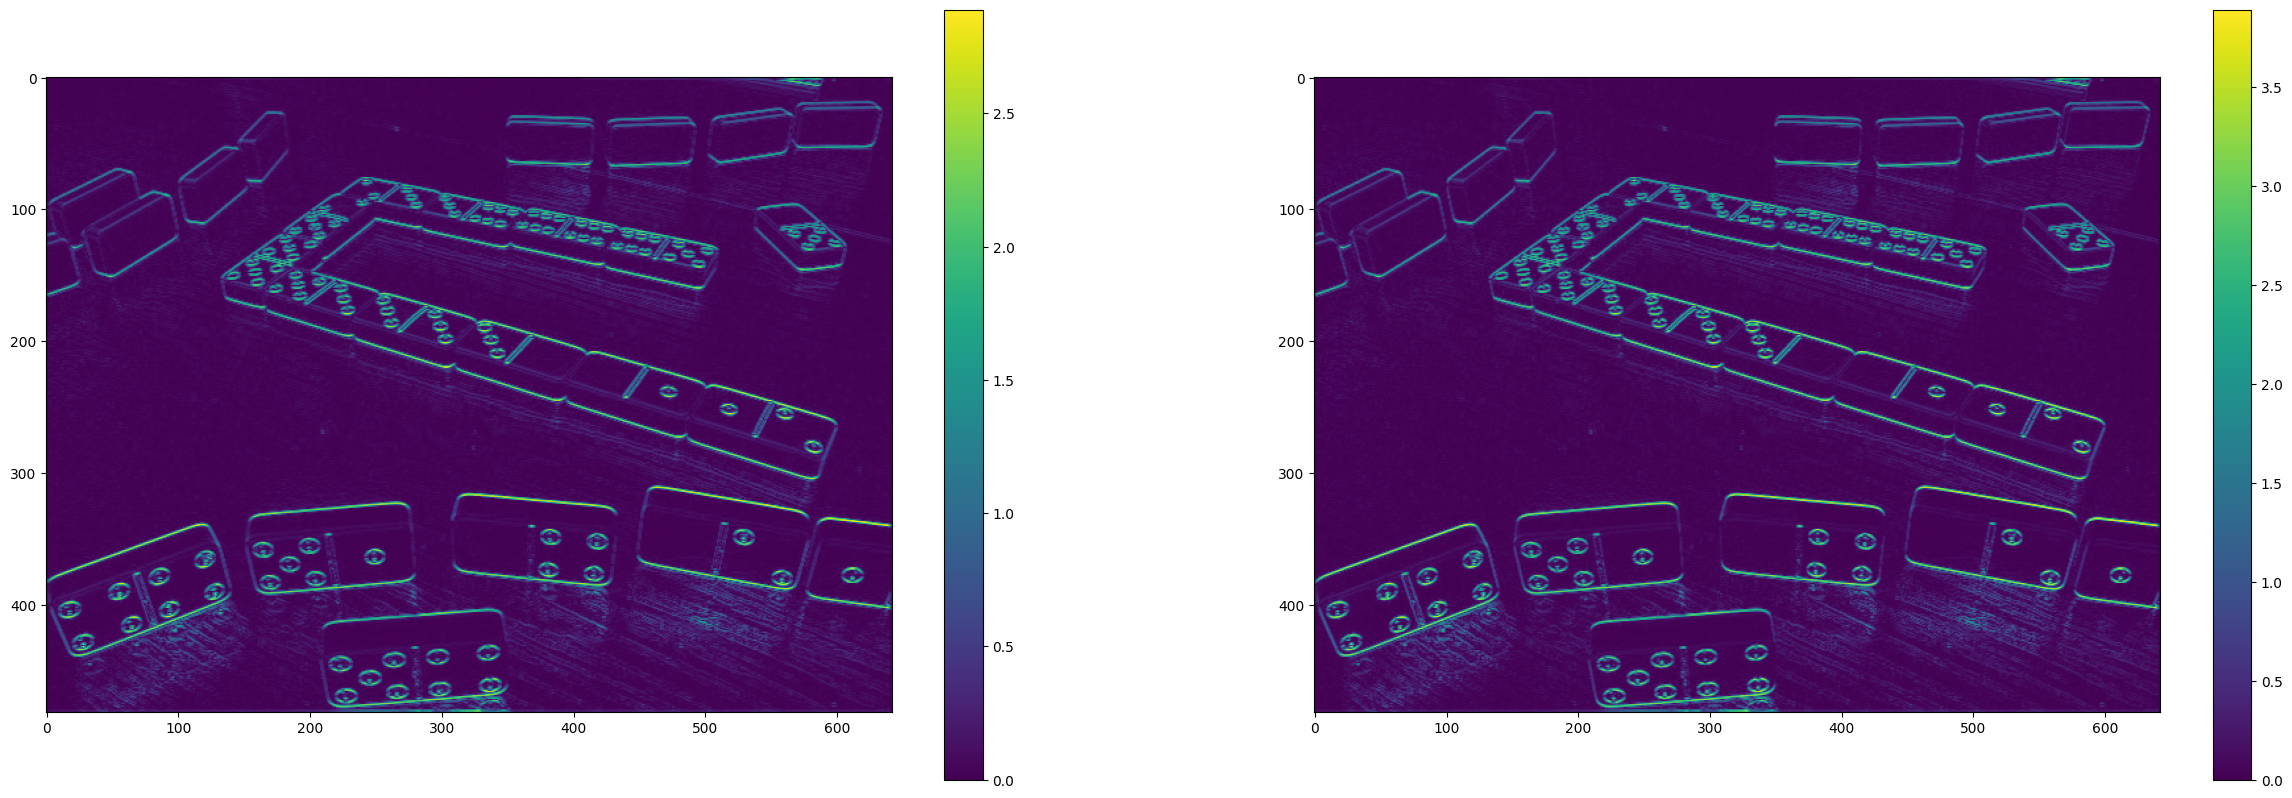

In [12]:
#affichage des contours independement du signe : 

abs_dom_h2 = np.abs(dominos_h2)

plt.figure(figsize=(30,10))

plt.subplot(121)
plt.imshow(abs_dom_h2)
plt.colorbar()

plt.subplot(122)
plt.imshow(np.abs(dominos_h3))
plt.colorbar()


4.  Quelle est la différence entre les filtres $H_2$ et $H_3$ ? (En cas
    de doute, reprendre cette question après la question 6.)

Avec H3, le flou fait sur sur les contours n'est pas uniforme, on conserve mieux l'information du pixel central (en horizontal)

5.  Comment obtenir une détection de contours verticaux ? Diagonaux ?
    Appliquez aux images dominos et monde.

Pour obtenir une detection de contours verticaux, il faut transposer les filtres H2 et H3 ou ([0 0 0] [1 0 -1] [0 0 0]) Pour detecter les contours diagonaux : ( [1 0 1] [0 -4 0] [1 0 1])

In [15]:
#Detection de contours verticaux 

H_v2 = np.transpose(H2)
H_v3 = np.transpose(H3)

dominos_v2 = signal.convolve2d(dominos,H_v2)
dominos_v3 = signal.convolve2d(dominos,H_v3)


print(H_v2)



[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


Text(0.5, 1.0, 'Detection verticale accuentuée dominos')

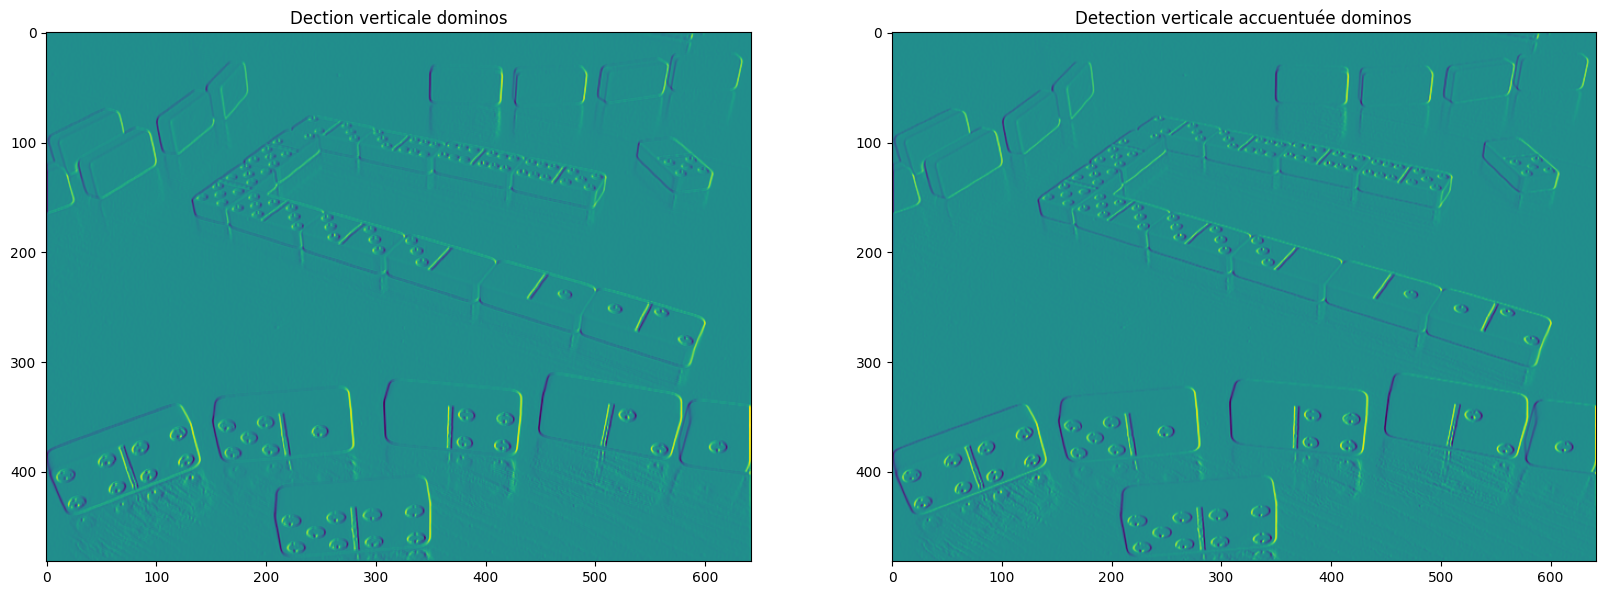

In [16]:
plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(dominos_v2)

plt.title("Dection verticale dominos")


plt.subplot(122)
plt.imshow(dominos_v3)
plt.title("Detection verticale accuentuée dominos")







In [46]:
Hd1 = np.array([[0, -1, 0 ],
                [-1, 0, 1],
                [0, 1, 0]])

Hd2 = np.array([[0, 1, 0 ],
                [-1, 0, 1],
                [0, -1, 0]])


Hd3 = np.array([[0, 0 ,1 ],    #laplacien diagonal
                [0, -2, 0],
                [-1, 0, 0]])




Text(0.5, 1.0, 'Detection contours diagonaux ordre 2 ')

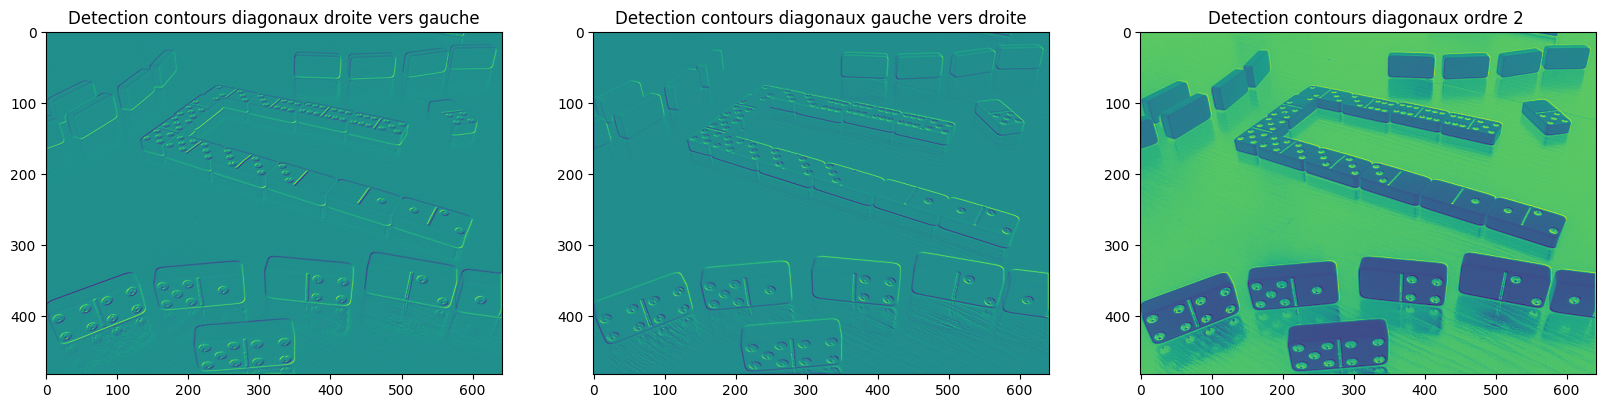

In [47]:
dominos_d1 = signal.convolve2d(dominos,Hd1)

dominos_d2 = signal.convolve2d(dominos,Hd2)

dominos_d3 = signal.convolve2d(dominos,Hd3)


plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(dominos_d1)
plt.title("Detection contours diagonaux droite vers gauche")

plt.subplot(132)
plt.imshow(dominos_d2)
plt.title("Detection contours diagonaux gauche vers droite")

plt.subplot(133)
plt.imshow(dominos_d3)
plt.title("Detection contours diagonaux ordre 2 ")







6.  Faites varier la taille des filtres, de manière isotrope ou non, et
    appliquez-les aux images dominos et monde. Quel est l'impact de la
    taille ? Que se passe-t-il si le masque de convolution n'est pas
    carré ?

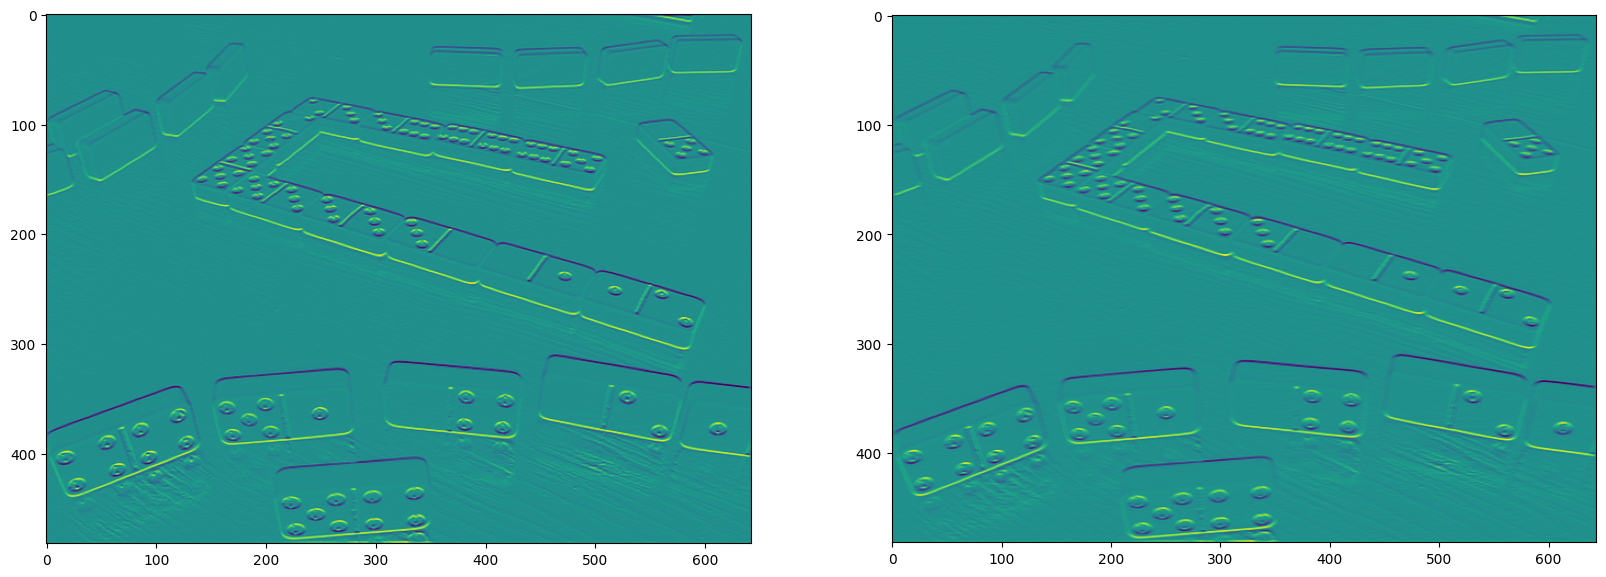

In [35]:
H2_g = np.array([[-1, -1, -1, -1, -1],
                 [0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 1]])


dominos_g_2 = signal.convolve2d(dominos,H2_g)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(dominos_h2)

plt.subplot(122)
plt.imshow(dominos_g_2)

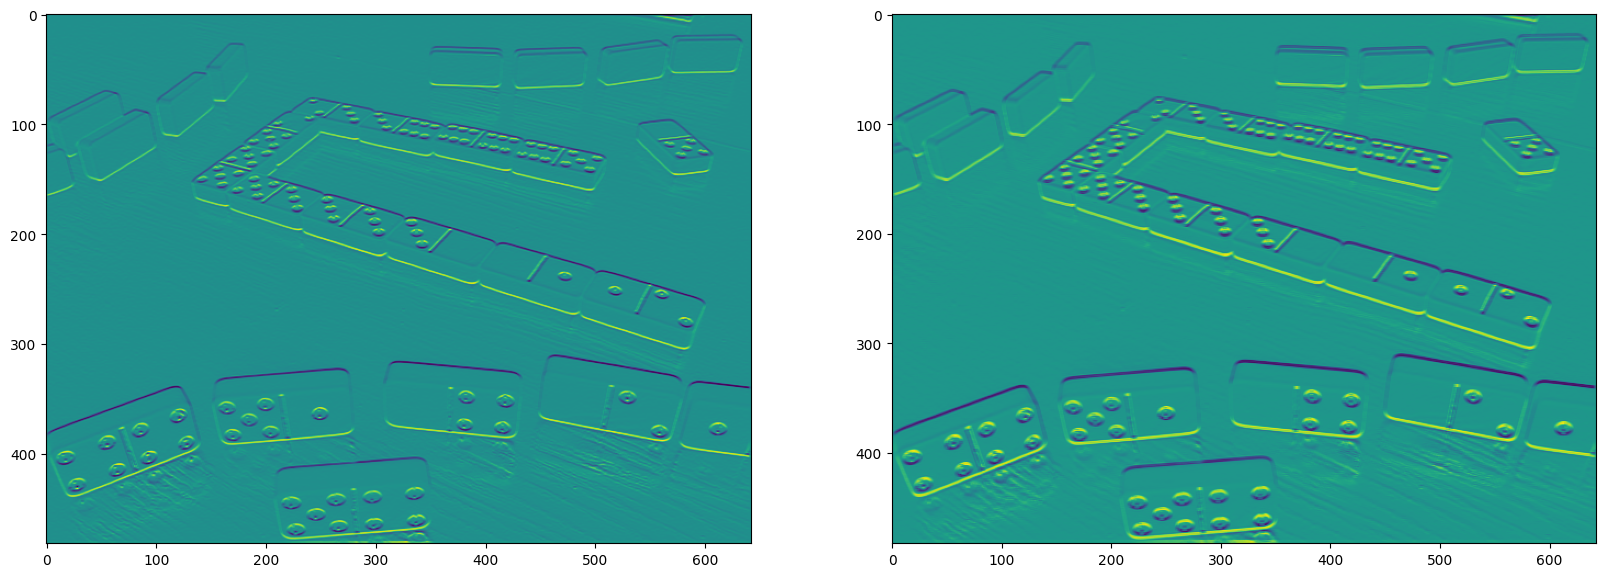

In [39]:
H2_gg = np.array([[-1, -1, -1, -1],
                 [0, 0, 0, 0],
                [0, 0, 0, 0],
                 [1, 1, 1, 1]])


dominos_gg_2 = signal.convolve2d(dominos,H2_gg)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(dominos_h2)

plt.subplot(122)
plt.imshow(dominos_gg_2)

Effet de la taille : 
selon la direction on aura un flou plus accentué
taille liée à l'importance donnée à ce que le filtre fait dans une direction donnée
anisotropie :  priviligie une direction